In [328]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn import metrics

import joblib

import matplotlib.pyplot as plt

train = pd.read_csv('static/data/train.csv')
test = pd.read_csv('static/data/test.csv')

In [329]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [331]:
y_train = train['label']
X_train = train.drop(columns=['label'])

In [332]:
del train

y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [333]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [334]:
print('Number of Trees used : ', model.n_estimators)

Number of Trees used :  100


In [335]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [336]:
predict= model.predict(X_train)
predict

array([1, 0, 1, ..., 7, 6, 9])

In [337]:
cm= metrics.confusion_matrix(y_train,model.predict(X_train))
cm

array([[4132,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 4684,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4177,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4351,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4072,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 3795,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4137,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4401,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4063,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 4188]])

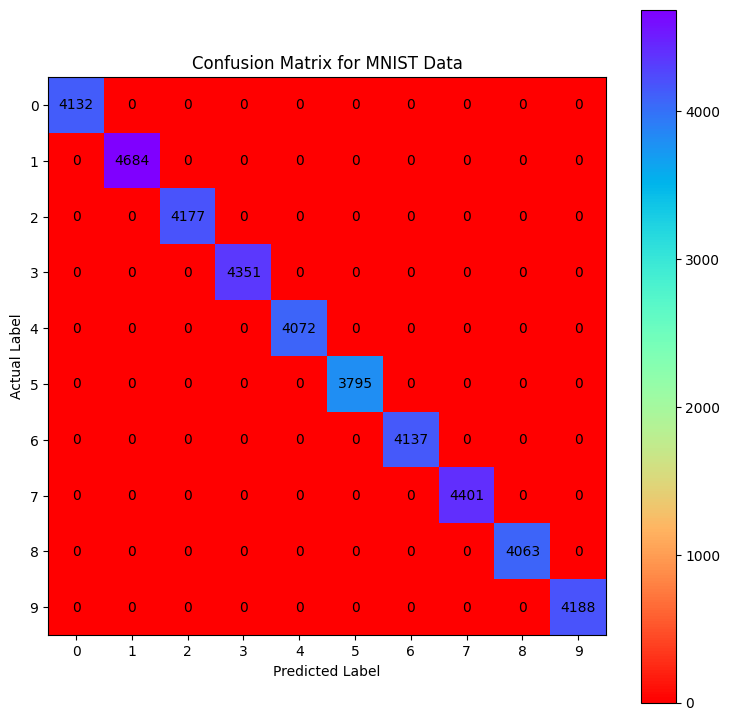

In [338]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [339]:
from sklearn.metrics import accuracy_score
trainaccuracy= accuracy_score(y_train,model.predict(X_train))
trainaccuracy
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

Train Data Accuracy    :100.0 %


In [340]:
from sklearn.model_selection import GridSearchCV

In [341]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [342]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [343]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [344]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: user 15.4 s, sys: 1.35 s, total: 16.7 s
Wall time: 19min 9s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [345]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [346]:
cm= metrics.confusion_matrix(y_train,rf_best.predict(X_train))
cm

array([[4087,    0,    0,    1,    4,    3,   22,    1,   12,    2],
       [   0, 4642,   14,    7,    5,    1,    7,    2,    4,    2],
       [  11,   14, 4081,    7,   16,    0,    2,   27,   17,    2],
       [   3,   23,   33, 4192,    0,    5,    7,   30,   32,   26],
       [   1,   16,    6,    0, 3959,    0,   14,    7,    2,   67],
       [   8,    8,    3,   32,    4, 3698,   29,    1,    4,    8],
       [  13,   10,    1,    0,    3,   12, 4092,    0,    6,    0],
       [   2,   29,   26,    1,   11,    0,    0, 4284,    2,   46],
       [  12,   37,   10,   26,   12,    5,   12,    5, 3922,   22],
       [  16,   17,    4,   60,   19,    1,    2,   47,   19, 4003]])

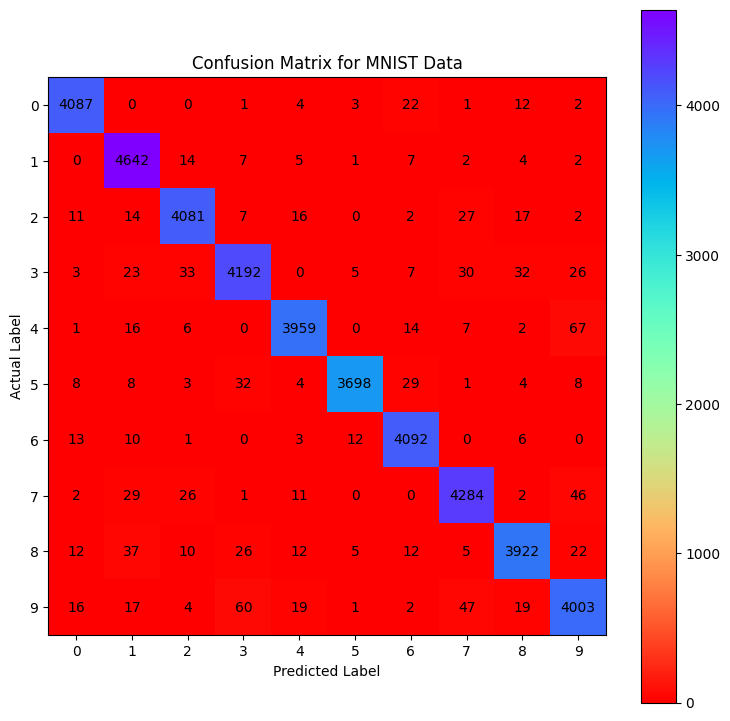

In [347]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [348]:
trainaccuracy= accuracy_score(y_train,rf_best.predict(X_train))
trainaccuracy
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

Train Data Accuracy    :97.52 %


In [349]:
result = model.predict(test)


result = pd.Series(result,name="Label")
result

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [350]:
from PIL import Image

image_file = Image.open('static/img/2.png')

In [351]:
from PIL import Image

image_file = Image.open('static/img/0.png')
image_file = image_file.convert('L')
image_file = image_file.point(lambda x: 255 - x)
image_file = image_file.resize((28, 28))
array_image_file = np.array(image_file)  
array_image_file = array_image_file.flatten() 

predict = model.predict(array_image_file.reshape(1, -1))
predict

/Users/florianberthelot/.pyenv/versions/3.10.7/envs/flask/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [352]:
path = 'static/model.pkl'

joblib.dump(model, path)

['static/model.pkl']

In [353]:
from keras.datasets import mnist

In [354]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [355]:
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [358]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [359]:
y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [360]:
model2 = RandomForestClassifier()

In [361]:
model2.fit(X_train,y_train)

/var/folders/wn/48rdsmmx10v4jhjmhxdnvqm80000gn/T/ipykernel_34194/1259910858.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train,y_train)


RandomForestClassifier()

In [362]:
predict= model2.predict(X_train)
predict

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [363]:
cm = metrics.confusion_matrix(y_train,model2.predict(X_train))
cm

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5958,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6131,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5842,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5421,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5918,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6265,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5851,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5949]])

In [364]:
from sklearn.metrics import accuracy_score
trainaccuracy= accuracy_score(y_train,model.predict(X_train))
trainaccuracy
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

/Users/florianberthelot/.pyenv/versions/3.10.7/envs/flask/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Train Data Accuracy    :98.65 %


In [365]:
from sklearn.model_selection import GridSearchCV

In [366]:
classifier_rf2 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [367]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200],
}

In [368]:
grid_search2 = GridSearchCV(estimator=classifier_rf2, param_grid=params,
                            cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [369]:
grid_search2.fit(X_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


/Users/florianberthelot/.pyenv/versions/3.10.7/envs/flask/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/florianberthelot/.pyenv/versions/3.10.7/envs/flask/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/florianberthelot/.pyenv/versions/3.10.7/envs/flask/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [370]:
rf_best2 = grid_search.best_estimator_
rf_best2

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [371]:
cm2= metrics.confusion_matrix(y_train,rf_best2.predict(X_train))
cm2

/Users/florianberthelot/.pyenv/versions/3.10.7/envs/flask/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[5828,    2,    3,    3,    4,    6,   38,    1,   35,    3],
       [   0, 6649,   33,    8,    9,    6,   12,    6,   12,    7],
       [  31,   23, 5753,   18,   37,    0,   12,   41,   40,    3],
       [   5,   33,   65, 5826,    2,   24,   11,   61,   61,   43],
       [   4,   28,   15,    1, 5600,    0,   33,   12,   10,  139],
       [  20,   21,    9,   98,   13, 5147,   57,    6,   25,   25],
       [  22,   26,    3,    0,    5,   38, 5814,    0,   10,    0],
       [   7,   52,   42,    3,   38,    0,    0, 6034,   10,   79],
       [  19,   76,   36,   79,   31,   29,   28,    9, 5483,   61],
       [  23,   30,   15,   89,   49,    7,    3,   90,   33, 5610]])

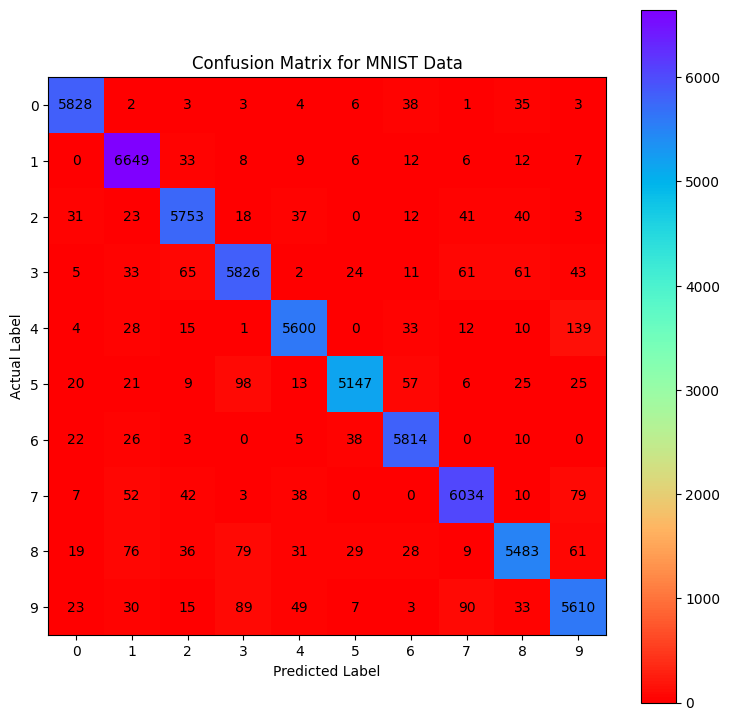

In [372]:
plt.figure(figsize=(9,9))
plt.imshow(cm2,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm2.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm2[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [373]:
trainaccuracy= accuracy_score(y_train,rf_best.predict(X_train))
trainaccuracy
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

/Users/florianberthelot/.pyenv/versions/3.10.7/envs/flask/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Train Data Accuracy    :96.24 %


In [374]:
predict = model2.predict(array_image_file.reshape(1, -1))
predict

array([0], dtype=uint8)

In [375]:
path = 'static/model2.pkl'

joblib.dump(model2, path)

['static/model2.pkl']